In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

## Describing Data

In [2]:
d = pd.read_csv('HR_comma_sep.csv')
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
d.describe()
# data set is clean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# there are some confusions about col names
# change time_spend_company -> time_spend_company_yrs
# change sales -> department
# notice that here we can't use d = d.rename...
d.rename(index=str, columns={'time_spend_company':'time_spend_company_yrs', 'sales':'department'}, inplace=True)
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# distribution of salary & department & distribution
print(d.salary.value_counts(), end='\n\n')
print(d.department.value_counts(), end='\n\n')
print(d.left.value_counts(), end='\n\n')
print(d.promotion_last_5years.value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

0    11428
1     3571
Name: left, dtype: int64

0    14680
1      319
Name: promotion_last_5years, dtype: int64


## Research Questions

The initial question asked by the dataset provider is why their best and most experienced employees leaving permaturely（过早的）? To answer this question, I want to split this big question into several smaller ones. 

Taking a look at our data and some descriptive statistics, we can quickly calculate and see that over 95% of the employees didn't get a promotion over the last 5 years in the company while the average years they stayed in the company was less than 4 years. And 1/4 of the employees chose to leave. Whether they got a promotion or not could possibly lead to their choice of leaving. 

In this data set, the target column is 'left'. All other features seem pretty relevant to to target, and possibly to each other. However, we can pick a few most obvious ones to start with:
- salary
- promotion
- satisfaction
- department
- average monthly hrs

With these features, we can analyze which feature has the most significant impact on "left". 

## Exploratory Data Visualization

### Heatmap

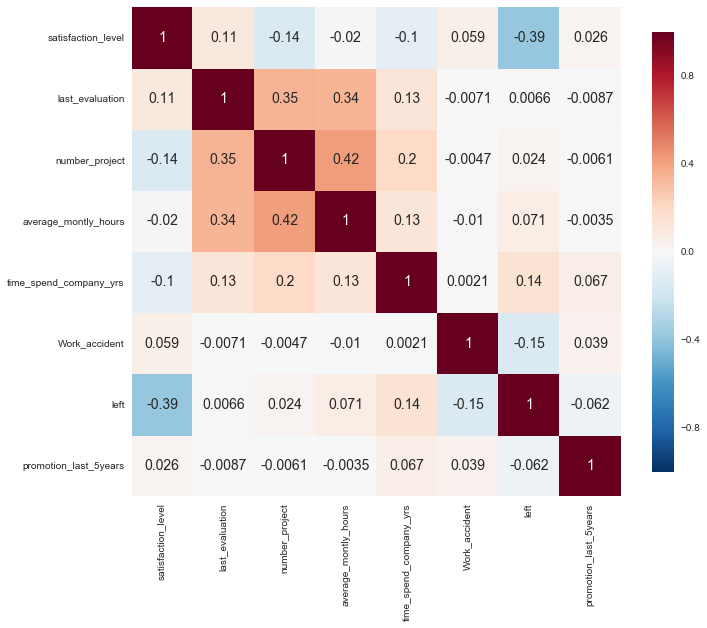

In [7]:
# 1st plot - sns.heatmap - determine important features
# annot=True labels values on each cube
# the 1st line makes the heatmap bigger
_, ax = plt.subplots(figsize =(11,9))
sns.heatmap(d.corr(), vmax=1, 
            annot=True, annot_kws = {'fontsize': 14}, 
            cbar_kws={ 'shrink' : 0.9 },
            square=True, 
            ax=ax)

From the above heatmap, we can see that 'average_monthly_hours' and 'number_project' has the largest coefficient level. Also, 'satisfaction_level' seems to have an impact on 'left'.

### Distributions of features

TypeError: unhashable type: 'list'

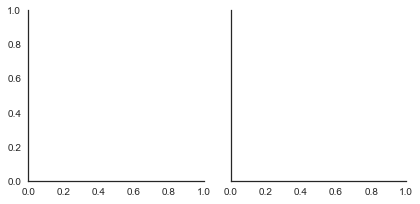

In [8]:
# 1st plot - FacetGrid plt.hist
# at first, we just lay everything out!
# doesn't work this way...
sns.FacetGrid(d, col='left')\
   .map(plt.hist, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promition_last_5years'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221711B8668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000221714C3978>]], dtype=object)

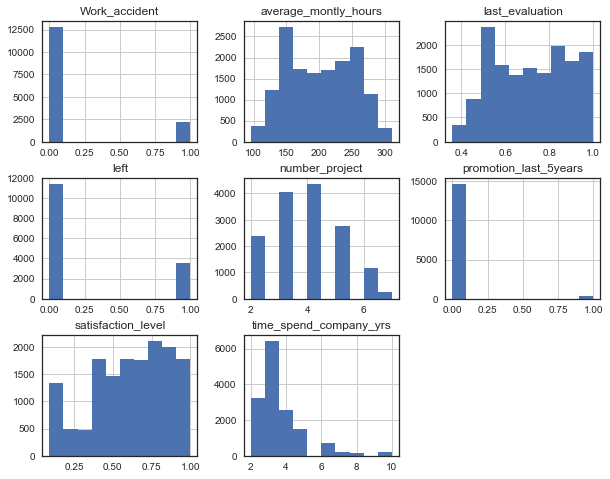

In [9]:
# 1st plot revision - pandas.hist
# not bad, but we want to divide them by 'left'
d.hist(figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221718E3EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022171BCAD30>]], dtype=object)

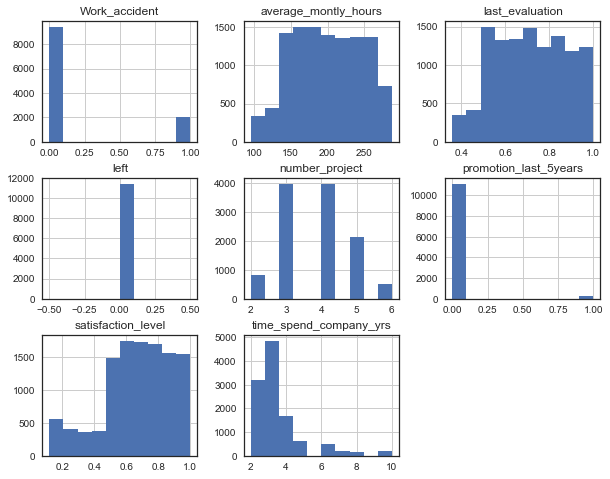

In [10]:
# 1st plot revision - 'left' == 0
# this works, but not efficient
d[d['left'] == 0].hist(figsize=(10,8))

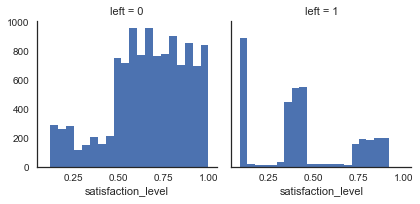

In [11]:
# 1st plot revision - FacetGrid plt.hist - satisfaction & left
# it doesn't work with all features
sns.FacetGrid(d, col='left')\
   .map(plt.hist, 'satisfaction_level', bins=20)

left
0    [[Axes(0.125,0.551739;0.158163x0.328261), Axes...
1    [[Axes(0.125,0.551739;0.158163x0.328261), Axes...
dtype: object

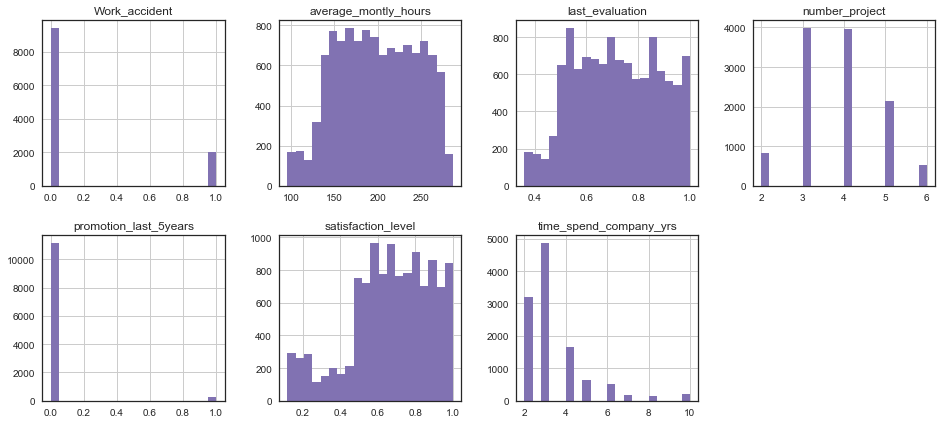

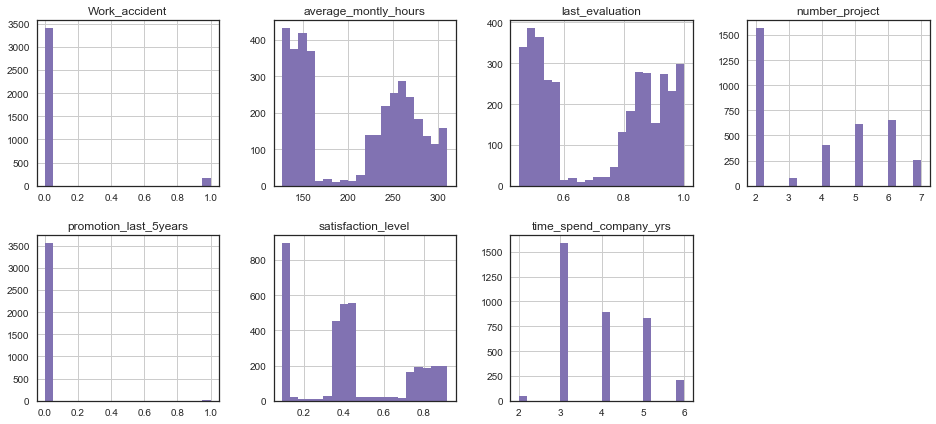

In [12]:
# 1st plot revision - groupby!!!
# finally works!!!
# layout controls number of hist row*col
# figsize=(16,7) is perfect
# one flaw is that there's no label whether left=0 or left=1, we can only judge by the two lines below
d.groupby('left').hist(color='m', bins=20, layout=(2,4), figsize=(16,7))

In [55]:
# some statistics about the above graph
# monthly hours
print('Monthly hours:')
print('stayed vs left:', round(d[d['left'] == 0].average_montly_hours.mean(),2), 'vs', round(d[d['left'] == 1].average_montly_hours.mean(),2))
# last evaluation
print('\nLast evaluation:')
print('stayed vs left:', round(d[d['left'] == 0].last_evaluation.mean(),2), 'vs', round(d[d['left'] == 1].last_evaluation.mean(),2))
# Number of projects
print('\nNumber of projects:')
print('stayed vs left:', round(d[d['left'] == 0].number_project.mean(),2), 'vs', round(d[d['left'] == 1].number_project.mean(),2))
print('stayed vs left - proportion of projects >= 6:', 
      round(d[(d['left'] == 0) & (d['number_project'] >= 6)].number_project.count() / d[(d['left'] == 0)].number_project.count() * 100,2), '%',
      'vs',
      round(d[(d['left'] == 1) & (d['number_project'] >= 6)].number_project.count() / d[(d['left'] == 1)].number_project.count() * 100,2), '%'
     )
# Satisfaction Level
print('\nSatisfaction level:')
print('stayed vs left:', round(d[d['left'] == 0].satisfaction_level.mean(),2), 'vs', round(d[d['left'] == 1].satisfaction_level.mean(),2))
# Time in company
print('\nTime in company:')
print('stayed vs left:', round(d[d['left'] == 0].time_spend_company_yrs.mean(),2), 'vs', round(d[d['left'] == 1].time_spend_company_yrs.mean(),2))

Monthly hours:
stayed vs left: 199.06 vs 207.42

Last evaluation:
stayed vs left: 0.72 vs 0.72

Number of projects:
stayed vs left: 3.79 vs 3.86
stayed vs left - proportion of projects >= 6: 4.54 % vs 25.51 %

Satisfaction level:
stayed vs left: 0.67 vs 0.44

Time in company:
stayed vs left: 3.38 vs 3.88


The above grouped charts and statistics indicate that:
- monthly hours: people who stayed worked less than who left, but more centered; left people either worked little or a lot;
- last evaluation: averages are equal, both 0.72, but again, left people either had very bad or great evaluations; 
- number of projects: averages are similar, but a much larger proportion of left people had 6 projects or more;
- satisfaction level: people who stayed were more satisfied than who left;
- time in company: people who stayed spent fewer years than who stayed

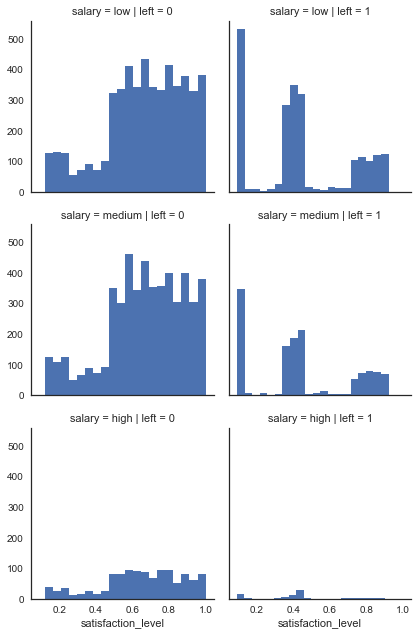

In [13]:
# 2nd plot - left & salary & satisfaction level
sns.FacetGrid(d, col='left', row='salary')\
   .map(plt.hist, 'satisfaction_level', bins=20)

In [ ]:
# salary to 0 1 2